# Image processing


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Seungyeop Lee (seungyeoplee@inha.edu) </div>_

<br>

---

## Filter

For meaningful analysis and usage of the signals, signal filtering is nessesary. The signal filtering contains noise reduction, signal decomposition, ... etc.






<br>

---

## Convolution

In signal processing, convolution is commonly used for applying filters. The convolution of two time-dependent functions, $f(t)$ and $g(t)$, denoted as $f*g$, is defined as:

$$
\displaystyle (f*g)(t):=\int _{-\infty }^{\infty }f(\tau )g(t-\tau )\,d\tau
$$

This operation represents the integration of the product of two functions over the entire time domain, where $g$ slides across the time domain.

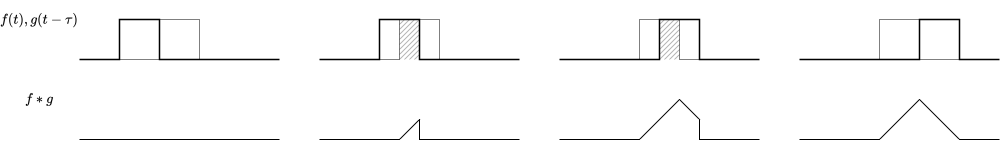

Through such operations, signals can be filtered. Such convolution operations are not limited to time-dependent functions but can also be applied to images. The convolution operation for images is as follows.

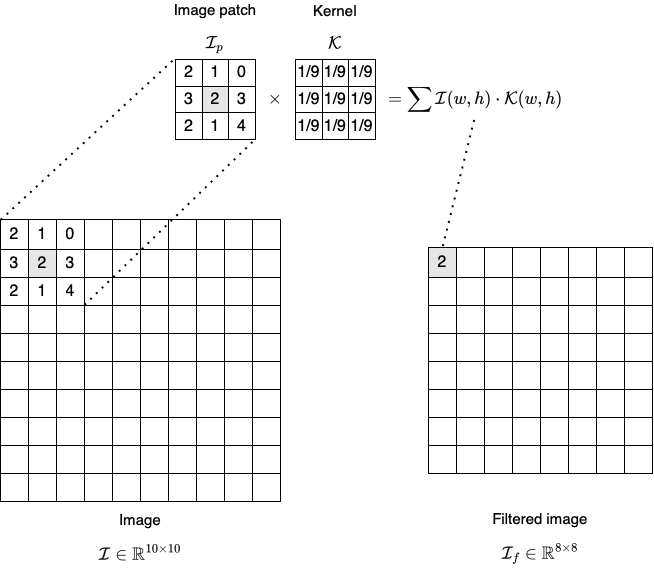

For all pixels in the original image, the following calculation is performed using a patch around each pixel and a kernel. The computed value becomes the pixel value in the filtered image. The kernel is a matrix designed according to the desired purpose of the filter. Depending on how the kernel is designed, the filter can act as a noise filter, gradient filter, etc.

As shown in the figure above, designing the kernel in this manner results in the mean filter, which outputs the average value of the patch pixels. The effect of the mean filter is image blurring, as demonstrated in the example below.

In [2]:
import numpy              as np
import numpy.linalg       as nl
import matplotlib.pyplot  as plt
import cv2
import requests

def load_image_from_url(url):
    response = requests.get(url)
    image_array = np.frombuffer(response.content, np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    return img

img_link = "https://jonghank.github.io/jhk-2024.jpg"

img = load_image_from_url(img_link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray_raw = cv2.resize(img, None, fx=0.25, fy=0.25)

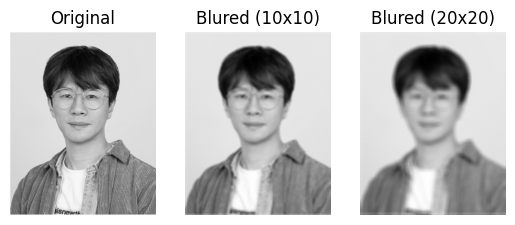

In [3]:
kernel_mean_10  = 1/100 * np.ones((10,10), dtype=np.float16)
kernel_mean_20 = 1/400 * np.ones((20,20), dtype=np.float16)

img_gray_flt_10  = cv2.filter2D(img_gray_raw, -1, kernel_mean_10 )
img_gray_flt_20 = cv2.filter2D(img_gray_raw, -1, kernel_mean_20)


fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(img_gray_raw, cmap='gray')
ax2.imshow(img_gray_flt_10, cmap='gray')
ax3.imshow(img_gray_flt_20, cmap='gray')
ax1.set_title("Original")
ax2.set_title("Blured (10x10)")
ax3.set_title("Blured (20x20)")
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

<br>

---

## Image noise filtering

Let us design filters to remove noise from an image using convolution operations. Specifically, we will analyze for different types of noise. Given an original image with random noise and salt-and-pepper noise, we will examine the smoothing performace of the mean filter illustrated above.

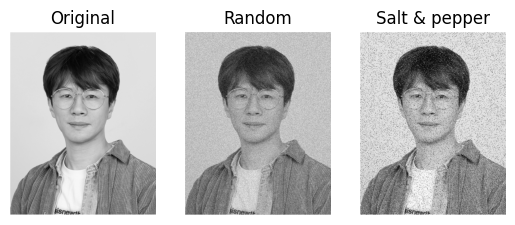

In [4]:
img_gray_noisy_gausian = img_gray_raw.copy() + 100*np.random.rand(*img_gray_raw.shape)
img_gray_noisy_salt_pepper = img_gray_raw.copy()

random_mask = np.random.rand(*img_gray_raw.shape)
salt_mask = np.where(random_mask > 0.95)
pepper_mask = np.where(random_mask < 0.05)
img_gray_noisy_salt_pepper[salt_mask] = 255
img_gray_noisy_salt_pepper[pepper_mask] = 0

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(img_gray_raw, cmap='gray')
ax2.imshow(img_gray_noisy_gausian, cmap='gray')
ax3.imshow(img_gray_noisy_salt_pepper, cmap='gray')
ax1.set_title("Original")
ax2.set_title("Random")
ax3.set_title("Salt & pepper")
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

The result of applying the previously described mean filter to an image containing both types of noise is as follows.

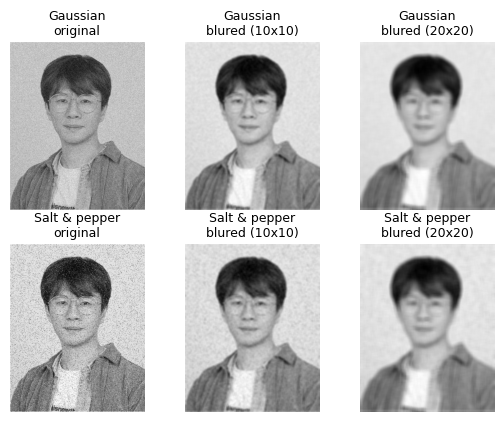

In [5]:
img_gray_gnoise_flt_10 = cv2.filter2D(img_gray_noisy_gausian, -1, kernel_mean_10)
img_gray_gnoise_flt_20 = cv2.filter2D(img_gray_noisy_gausian, -1, kernel_mean_20)
img_gray_spnoise_flt_10 = cv2.filter2D(img_gray_noisy_salt_pepper, -1, kernel_mean_10 )
img_gray_spnoise_flt_20 = cv2.filter2D(img_gray_noisy_salt_pepper, -1, kernel_mean_20 )

fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.imshow(img_gray_noisy_gausian, cmap='gray')
ax2.imshow(img_gray_gnoise_flt_10, cmap='gray')
ax3.imshow(img_gray_gnoise_flt_20, cmap='gray')
ax4.imshow(img_gray_noisy_salt_pepper, cmap='gray')
ax5.imshow(img_gray_spnoise_flt_10, cmap='gray')
ax6.imshow(img_gray_spnoise_flt_20, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

ax1.set_title("Gaussian\noriginal", fontsize=9)
ax2.set_title("Gaussian\nblured (10x10)", fontsize=9)
ax3.set_title("Gaussian\nblured (20x20)", fontsize=9)
ax4.set_title("Salt & pepper\noriginal", fontsize=9)
ax5.set_title("Salt & pepper\nblured (10x10)", fontsize=9)
ax6.set_title("Salt & pepper\nblured (20x20)", fontsize=9)

plt.show()

The results of applying the mean filter show that both images are smoothed. However, for the image containing salt-and-pepper noise, the noise attenuation is relatively less effective after applying the mean filter.

This demonstrates the need to design filters tailored to the specific characteristics of various types of noise.